<CENTER>
</br>
<p><font size="5"> Nathan Sanglier </span></p>
<p><font size="4">  Image Processing </font></p>
<p></p>
<p><font size="5"> Image Denoising using Singular Value Decomposition </font></p>
</p></br>
</p>
</CENTER>

----------------------------

##  <span style="color:#00B8DE"> 0 - Introduction </span>

> The goal of this notebook is to denoise an image using Singular Value Decomposition (SVD), in Julia programming language. If you want to see the plots and LaTeX equations appear well, please download and run the notebook.

> $\underline{SVD\ Theorem}$ : Let $A \in \mathbb{R}^{n \times m}$ and $rank(A) = r$. $\\$
Then, there exist orthogonal matrices $U \in \mathbb{R}^{n \times r}$ and $V \in \mathbb{R}^{n \times r}$ ($U^T U = V^T V = I_r$)  such that $A = U \Sigma V^T$ where $\Sigma$ is diagonal and $\Sigma \succ 0$ (positive definite, i.e. all the eigenvalues of $\Sigma$ are $> 0$). $\\$
The values on the diagonal of $\Sigma$ are called singular values of $A$ (i.e. the squared-roots of eigenvalues $of A^T A$). If $A$ is symmetric, the singular values are the absolute values of eigenvalues of $A$ ($A x = \lambda x \Rightarrow A^T A x = \lambda A^T x = \lambda A x = \lambda^2 x$). $\\$
> This is called the Singular Value Decomposition of $A$.

> $\underline{Proof}$ : Let $A \in \mathbb{R}^{n \times m}$ and $rank(A) = r$. Then, $A^T A$ is a real symmetric matrix. $\\$
So, according to the Spectral Theorem, $A^T A$ can be decomposed such that $A^T A = Q D Q^T$ where Q in an orthogonal matrix, and $D$ contains the eigenvalues of $A^T A$, which are all zero or positive ($(A^T A) x = \lambda x \Leftrightarrow x^T A^T A x = \lambda x^T x \Leftrightarrow {\lVert A x \rVert}^2 = \lambda {\lVert x \rVert}^2$). Thus, $D$ can be written as $diag({\sigma_1}^2,...,{\sigma_n}^2)$. $\\$
We assume the eigenvalues of $A^T A$ are sorted in decreasing order and only the first $r'$ $\sigma_i$'s are $> 0$ (the others are $= 0$, but we need a diagonal positive definite matrix, so we'll remove them). We denote by $V \in \mathbb{R}^{n \times r'}$ the first $r'$ columns of $Q$ ($V$ is orthogonal as $Q$ is orthogonal) and $\Sigma^2 = diag({\sigma_1}^2,...,{\sigma_{r'}}^2)$. $\\$
We have $A^T A = V \Sigma^2 V^T \Leftrightarrow V^T A^T A V = \Sigma^2 \Leftrightarrow \Sigma^{-1} V^T A^T A V \Sigma^{-1} = I_{r'} \Leftrightarrow U^T A V \Sigma^{-1} = I_{r'}$ where $U = A V \Sigma^{-1}$ (we can see that $U^T U = I_{r'}$, so $U$ is orthogonal). So, we have $A = U \Sigma V^T$ and $r = r'$ since $rank(U \Sigma V^T) = r'$.

> Singular Value Decomposition is useful as it enables to approximate the original matrix with a lower rank approximation. For instance, by discarding too small singular values, noise in some images can be reduced.

> $\underline{Eckart\ Young\ Mirsky\ Theorem}$ : Let $A \in \mathbb{R}^{n \times m}$, $rank(A) = r$ and $A = U \Sigma V^T = \sum_{i=1}^{r} {\sigma}_i u_i v_i^T$ where $u_i$ and $v_i$ are the $i$-th columns of $U$ and $V$. We assume the ${\sigma}_i$'s are sorted in decreasing order. For a matrix $M$, we denote the operator norm with $\lVert M \rVert = \max_{{\lVert x \rVert}_2 = 1} {\lVert M x \rVert}_2$ (i.e. it is the spectral norm: the largest singular value of M). $\\$
Then, for $k < r$, we have $\min_{B \in \mathbb{R}^{n \times m}, \ rank(B) = k} \lVert A - B \rVert = {\sigma}_{k+1}$ and the minimum is achieved by $A_k = \sum_{i=1}^{k} {\sigma}_i u_i v_i^T$. $\\$
It is a reduced-rank approximation of A.

> $\underline{Proof}$ : Let us assume the hypotheses formulated above. Let's choose $x \in \mathbb{R}^n$ with $\lVert x \rVert = 1$. $\\$
> - We have $(A - A_k) x = \sum_{i=k+1}^{r} {\sigma}_i u_i (v_i^T x)$, so ${\lVert (A - A_k) x \rVert}^2 = \sum_{p=k+1}^{r} \sum_{i=k+1}^{r} {\sigma}_p {\sigma}_i u_p^T u_i^T (v_p^T x) (v_i^T x)$. But $V$ is orthogonal, so its columns are orthonormal ($ p \ne i \Rightarrow  \langle v_p, v_i\rangle = 0$, and $\lVert v_p \rVert = 1$). Thus, ${\lVert (A - A_k) x \rVert}^2 = \sum_{i=k+1}^{r} {\sigma_i}^2 {(v_i^T x)}^2 \leq {\sigma_{k+1}}^2 \sum_{i=k+1}^{r} {(v_i^T x)}^2$. Moreover, $\sum_{i=k+1}^{r} {(v_i^T x)}^2 = \sum_{p=1}^{n} \sum_{j=1}^{n} x_p x_j \tilde v_p \tilde {v_j}^T$ where $\tilde V_p$ is the $p$-th line of $V$. Since the lines of V are orthonormal, then $\sum_{i=k+1}^{r} {(v_i^T x)}^2 = {\lVert x \rVert}^2 = 1$ and ${\lVert (A - A_k) x \rVert}^2 \leq {\sigma_{k+1}}^2$. Finally, if we take $x = v_{k+1}$, we have ${\lVert (A - A_k) x \rVert}^2 = {\sigma_{k+1}}^2$. $\\$
Without doing all of this, one could also have noticed that since $A - A_k = \sum_{i=k+1}^{r} {\sigma}_i u_i v_i^T$, then its largest singular value is obviously $\sigma_{k+1}$.
>
> - To finish, let us show that the minimum is indeed $\sigma_{k+1}$. Let $B \in \mathbb{R}^{n \times m}$ such that $rank(B) = k$. We denote $(x_i)_{i=1:m-k}$ a basis of its kernel. Let's take $x$ a unit vector in $E = Span\{(x_i)_{i=1:m-k}, (v_i)_{i=1:k+1}\}$. We have $Span\{(x_i)_{i=1:m-k}\} \cap Span\{(v_i)_{i=1:k+1}\} \ne \emptyset$, otherwise we would have $dim(E) = m+1$, which is not possible. Then, ${\lVert (A - B) \rVert}^2 \geq {\lVert (A - B) x \rVert}^2 = {\lVert A x - 0 \rVert}^2 = {\lVert \sum_{i=1}^{r} {\sigma}_i u_i (v_i^T x) \rVert}^2 \geq {\lVert \sum_{i=1}^{k+1} {\sigma}_i u_i (v_i^T x) \rVert}^2 \geq {\sigma_{k+1}}^2 \sum_{i=1}^{k+1} {(v_i^T x)}^2 = {\sigma_{k+1}}^2$.

##  <span style="color:#00B8DE"> I - Problem </span>

> We generate $nb\_images= 50$ images representing the same function $f(x,y)=1_{\{x^2+y^2\leq 1\}}(x,y)$ over the area $[-1.2,-1.2]\times[1.2,1.2]$, each in the presence of white Gaussian noise with variance 1. 
> We will use SVD to get a better image out of these.

#### <span style="color:#DAF7A6">I. 1. Imports </span>

In [2]:
using Plots
using LinearAlgebra
using Statistics

#### <span style="color:#DAF7A6">I. 2. Generation & Plot of Images </span>

In [3]:
# Function considered: disk with radius 1 centered in (0, 0)
function f(x, y)
    if x^2 + y^2 <= 1
        return 1
    else
        return 0
    end
end;

> Let's generate the images by adding a white gaussian noise on the function output.

In [4]:
# Function to generate a noisy image
function generate_noisy_img(x, y, variance)

    z = f.(x', y) + (randn(length(y), length(x)) * sqrt(variance))
    
    return z
end;

In [5]:
# Function to plot an image
function plot_img(img)
    return heatmap(img, color=:grays, size=(300, 300), axis=false, colorbar=false)
end;

In [6]:
width, height = 100, 100
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
variance = 1

x, y = range(x_min, x_max, width), range(y_min, y_max, height)

# We generate 50 noisy images each of size 100x100 and store them in an array of size 100x100x50
nb_images = 50
array_noisy_img = zeros(height, width, nb_images)
for i in 1:nb_images
    array_noisy_img[:, :, i] = generate_noisy_img(x, y, variance)
end

In [7]:
init_img = f.(x', y)
noisy_img_1 = array_noisy_img[:, :, 1]
noisy_img_2 = array_noisy_img[:, :, 2]

plot_init_img = plot_img(init_img)
plot_noisy_img_1 = plot_img(noisy_img_1)
plot_noisy_img_2 = plot_img(noisy_img_1);

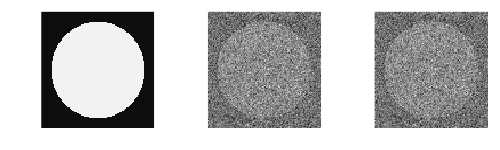

In [8]:
plot(plot_init_img, plot_noisy_img_1, plot_noisy_img_2, size=(500, 150), layout=(1, 3))

> The first image is the reference image (i.e. the one without noise), whereas the 2 others are noisy images.

#### <span style="color:#DAF7A6">I. 3. Reduced Rank Approximation with SVD </span>

> To perform SVD, let us reshape our array of noisy images to get a matrix of size $100^2 \times 50$, i.e. for an image, we put all pixels in one column.
> The singular values returned by the SVD method of LinearAlgebra are ordered in decreasing order.

In [9]:
array_flat_noisy_img = reshape(array_noisy_img, height*width, nb_images)
U, sing_values, V = svd(array_flat_noisy_img);

> Let's plot the singular values (we normalize the array of singular values) to decide the rank we will choose for our approximation of the reshaped array of noisy images.

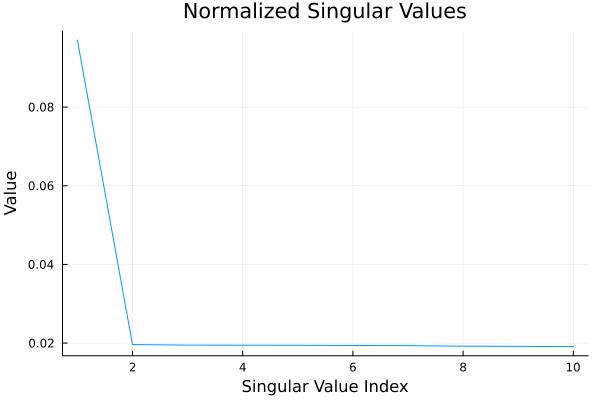

In [10]:
sing_values_normalized = sing_values/sum(sing_values)
plot(sing_values_normalized[1:10], title="Normalized Singular Values", label="")
xlabel!("Singular Value Index")
ylabel!("Value")

> As we can see, we only need to first singular value to extract the essential information of our images. Thus, we will choose the rank $k = 1$.

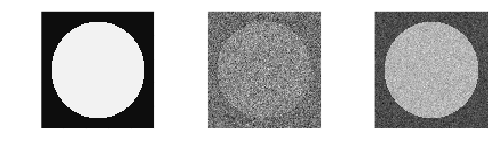

In [11]:
k = 1  # nb of singular values to keep
# Reduced rank approximation of reshaped array
array_flat_denoisy_img = U[:, 1:k] * Diagonal(sing_values[1:k]) * V[:, 1:k]'
array_denoisy_img = reshape(array_flat_denoisy_img, height, width, nb_images)

# Thus, the final denoised image is the mean of each new image
denoisy_img = mean(array_denoisy_img, dims=3)[:, :, 1]

plot_denoisy_img = plot_img(denoisy_img)
plot(plot_init_img, plot_noisy_img_1, plot_denoisy_img, size=(500, 150), layout=(1, 3))

> The first image is the reference image , the second one a noisy image, and the last one the denoised image using SVD. $\\$
> We can clearly see that SVD helped denoise our image.

> It could be interesting to compare it with the mean image of our images.

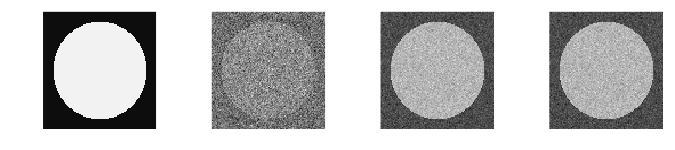

In [12]:
mean_noisy_img = mean(array_noisy_img, dims=3)[:, :, 1]

plot_mean_noisy_img = plot_img(mean_noisy_img)
plot(plot_init_img, plot_noisy_img_1, plot_denoisy_img, plot_mean_noisy_img, size=(675, 150), layout=(1, 4))

> The first image is the reference image , the second one a noisy image, the third one the denoised image using SVD, and the last one the mean image. $\\$
> As expected, since we have a gaussian white noise, then the mean of the gaussian distribution associated is 0, thus by taking the mean of the images, we delete this noise. $\\$
> So when there is just an addition of a gaussian noise to the output function, no need to perform SVD, just take the mean of images accross each pixel.

#### <span style="color:#DAF7A6">I. 4. Adding an Amplitude Noise </span>

> Now, let's consider the case where there is still the gaussian white noise added to the function output, but also a gaussian noise on the amplitude of the function output.

In [13]:
# New function to generate a noisy image
function generate_noisy_img_v2(x, y, variance)

    z = f.(x', y) * randn() + (randn(length(y), length(x)) * sqrt(variance))
    
    return z
end;

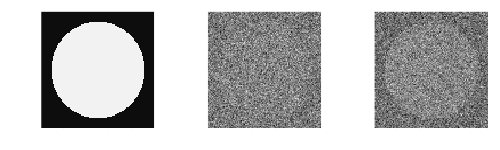

In [14]:
array_noisy_img = zeros(height, width, nb_images)
for i in 1:nb_images
    array_noisy_img[:, :, i] = generate_noisy_img_v2(x, y, variance)
end

noisy_img_1 = array_noisy_img[:, :, 1]
noisy_img_2 = array_noisy_img[:, :, 2]

plot_noisy_img_1 = plot_img(noisy_img_1)
plot_noisy_img_2 = plot_img(noisy_img_2)

plot(plot_init_img, plot_noisy_img_1, plot_noisy_img_2, size=(500, 150), layout=(1, 3))

> The first image is the reference image (i.e. the one without noise), whereas the 2 others are noisy images.

> Let us perform SVD.

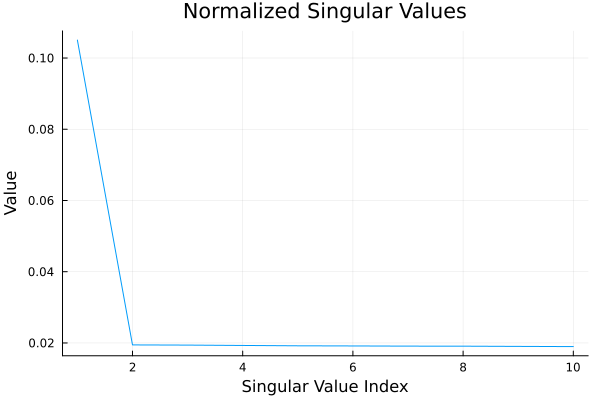

In [15]:
array_flat_noisy_img = reshape(array_noisy_img, height*width, nb_images)
U, sing_values, V = svd(array_flat_noisy_img)

sing_values_normalized = sing_values/sum(sing_values)
plot(sing_values_normalized[1:10], title="Normalized Singular Values", label="")
xlabel!("Singular Value Index")
ylabel!("Value")

> As we can see, we only need to first singular value to extract the essential information of our images. Thus, we will choose the rank $k = 1$.

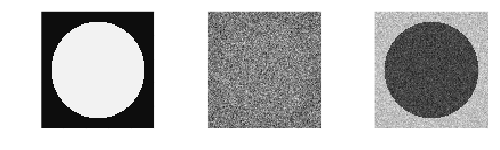

In [16]:
k = 1  # nb of singular values to keep
# Reduced rank approximation of reshaped array
array_flat_denoisy_img = U[:, 1:k] * Diagonal(sing_values[1:k]) * V[:, 1:k]'
array_denoisy_img = reshape(array_flat_denoisy_img, height, width, nb_images)

# Thus, the final denoised image is the mean of each new image
denoisy_img = mean(array_denoisy_img, dims=3)[:, :, 1]

plot_denoisy_img = plot_img(denoisy_img)
plot(plot_init_img, plot_noisy_img_1, plot_denoisy_img, size=(500, 150), layout=(1, 3))

> The first image is the reference image , the second one a noisy image, and the last one the denoised image using SVD. $\\$
> We can clearly see that SVD helped denoise our image.

> Let us compare it with the mean image of our images.

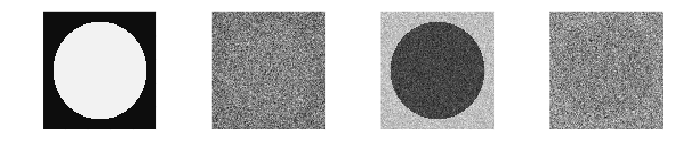

In [17]:
mean_noisy_img = mean(array_noisy_img, dims=3)[:, :, 1]

plot_mean_noisy_img = plot_img(mean_noisy_img)
plot(plot_init_img, plot_noisy_img_1, plot_denoisy_img, plot_mean_noisy_img, size=(675, 150), layout=(1, 4))

> The first image is the reference image , the second one a noisy image, the third one the denoised image using SVD, and the last one the mean image. $\\$
> Now, unlike the previous case, we can see that performing SVD leads to better results than simply computing the average of images. This is due to the fact that this time, we have a noise on this amplitude, which cannot be cancelled by taking the mean of the images.

##  <span style="color:#00B8DE"> II - Conclusion </span>

> Finally, we have seen that reduced rank approximations of matrices, such as the one in Eckart-Young-Mirsky-Theorem (i.e. with SVD) are useful if one wants to denoise an image when obvious approaches are not performing well. Of course, there are many other applications of the SVD and this theorem.